Importing all necessary modules

In [77]:
try:
    import numpy as np
    import pandas as pd
    import matplotlib.pyplot as plt   
    print("all modules imported succesfully")
except Exception as e:
    print(e)
    exit()

all modules imported succesfully


In [78]:
data = pd.read_csv('Datasets/DS/insurance.csv',na_filter=False)
data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [79]:
data.tail()

,age,sex,bmi,children,smoker,region,charges
1333,50,male,30.97,3,no,northwest,10600.5483
1334,18,female,31.92,0,no,northeast,2205.9808
1335,18,female,36.85,0,no,southeast,1629.8335
1336,21,female,25.80,0,no,southwest,2007.9450
1337,61,female,29.07,0,yes,northwest,29141.3603


In [80]:
data.shape

(1338, 7)

In [81]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [82]:
data.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [83]:
data.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [84]:
data.describe(include='all')

,age,sex,bmi,children,smoker,region,charges
count,1338.000000,1338,1338.000000,1338.000000,1338,1338,1338.000000
unique,NaN,2,NaN,NaN,2,4,NaN
top,NaN,male,NaN,NaN,no,southeast,NaN
freq,NaN,676,NaN,NaN,1064,364,NaN
mean,39.207025,NaN,30.663397,1.094918,NaN,NaN,13270.422265
std,14.049960,NaN,6.098187,1.205493,NaN,NaN,12110.011237
min,18.000000,NaN,15.960000,0.000000,NaN,NaN,1121.873900
25%,27.000000,NaN,26.296250,0.000000,NaN,NaN,4740.287150
50%,39.000000,NaN,30.400000,1.000000,NaN,NaN,9382.033000
75%,51.000000,NaN,34.693750,2.000000,NaN,NaN,16639.912515


In [85]:
data['sex'].unique()

array(['female', 'male'], dtype=object)

In [86]:
data['sex']=data['sex'].map({'female':0,'male':1})

In [87]:
data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,yes,southwest,16884.92400
1,18,1,33.770,1,no,southeast,1725.55230
2,28,1,33.000,3,no,southeast,4449.46200
3,33,1,22.705,0,no,northwest,21984.47061
4,32,1,28.880,0,no,northwest,3866.85520


In [88]:
data['smoker']=data['smoker'].map({'yes':0,'no':1})

In [89]:
data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,0,southwest,16884.92400
1,18,1,33.770,1,1,southeast,1725.55230
2,28,1,33.000,3,1,southeast,4449.46200
3,33,1,22.705,0,1,northwest,21984.47061
4,32,1,28.880,0,1,northwest,3866.85520


In [90]:
data['region'].unique()

array(['southwest', 'southeast', 'northwest', 'northeast'], dtype=object)

In [91]:
# data['region']=data['region'].map({'yes':0,'no':1})
data['region']=data['region'].map({data['region'].unique()[i]:i+1 for i in range(len(data['region'].unique()))})

In [92]:
data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,0,1,16884.92400
1,18,1,33.770,1,1,2,1725.55230
2,28,1,33.000,3,1,2,4449.46200
3,33,1,22.705,0,1,3,21984.47061
4,32,1,28.880,0,1,3,3866.85520


In [93]:
data.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges'], dtype='object')

In [94]:
X = data.drop(['charges'],axis=1)

In [95]:
X

,age,sex,bmi,children,smoker,region
0,19,0,27.900,0,0,1
1,18,1,33.770,1,1,2
2,28,1,33.000,3,1,2
3,33,1,22.705,0,1,3
4,32,1,28.880,0,1,3
...,...,...,...,...,...,...
1333,50,1,30.970,3,1,3
1334,18,0,31.920,0,1,4
1335,18,0,36.850,0,1,2
1336,21,0,25.800,0,1,1


In [96]:
y = data['charges']

In [97]:
y

0       16884.92400
1        1725.55230
2        4449.46200
3       21984.47061
4        3866.85520
           ...     
1333    10600.54830
1334     2205.98080
1335     1629.83350
1336     2007.94500
1337    29141.36030
Name: charges, Length: 1338, dtype: float64

In [98]:
from sklearn.model_selection import train_test_split

In [99]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.05,random_state=42)

In [100]:
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor,GradientBoostingRegressor

In [101]:
lr = LinearRegression()
svm = SVR()
rf = RandomForestRegressor()
gr = GradientBoostingRegressor()

lr.fit(X_train,y_train)
svm.fit(X_train,y_train)
rf.fit(X_train,y_train)
gr.fit(X_train,y_train)

GradientBoostingRegressor()

In [102]:
y_pred1 = lr.predict(X_test)
y_pred2 = svm.predict(X_test)
y_pred3 = rf.predict(X_test)
y_pred4 = gr.predict(X_test)

In [103]:
df1 = pd.DataFrame({'Actual':y_test,'Lr':y_pred1,'svm':y_pred2,'rf':y_pred3,'gr':y_pred4})

In [104]:
df1

,Actual,Lr,svm,rf,gr
764,9095.06825,9052.241129,9316.855567,10684.846588,10476.617849
887,5272.17580,7125.090571,9246.065379,5457.648097,5501.289155
890,29330.98315,37085.966485,9440.986941,28449.026000,28061.260495
1293,9301.89355,9439.246125,9325.299408,10076.880562,9732.520304
259,33750.29180,27011.505297,9153.730884,34577.696589,34141.153593
...,...,...,...,...,...
770,27941.28758,16007.207782,9431.139963,20673.998749,15820.720848
367,8017.06115,7893.859544,9292.116308,7535.926459,8183.385577
1098,23045.56616,11836.849078,9375.589193,10680.466557,12013.391747
63,4133.64165,4175.698904,9190.282243,5180.180542,5970.664257


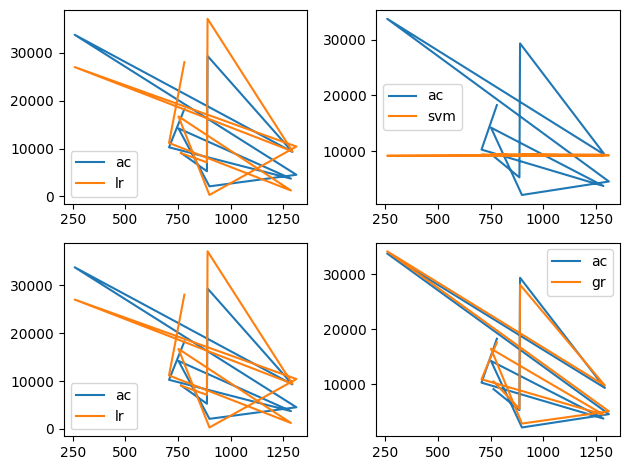

In [105]:
# try:
#     plt.plot(df1['Actual'].iloc[0:11],label="ac")
# except Exception as e:
#     print(e)
plt.subplot(221)
plt.plot(df1['Actual'].iloc[0:11],label="ac")
plt.plot(df1['Lr'].iloc[0:11],label='lr')
plt.legend()


plt.subplot(222)
plt.plot(df1['Actual'].iloc[0:11],label='ac')
plt.plot(df1['svm'].iloc[0:11],label='svm')
plt.legend()


plt.subplot(223)
plt.plot(df1['Actual'].iloc[0:11],label='ac')
plt.plot(df1['Lr'].iloc[0:11],label='lr')
plt.legend()


plt.subplot(224)
plt.plot(df1['Actual'].iloc[0:11],label='ac')
plt.plot(df1['gr'].iloc[0:11],label='gr')
plt.legend()


plt.tight_layout()
plt.legend()

In [106]:
from sklearn import metrics

In [107]:
score1 = metrics.r2_score(y_test,y_pred1)
score2 = metrics.r2_score(y_test,y_pred2)
score3 = metrics.r2_score(y_test,y_pred3)
score4 = metrics.r2_score(y_test,y_pred4)

In [108]:
print(score1, score2, score3, score4)

0.8110732903658374 -0.12043543587742511 0.8698119012272219 0.8789753263552891


In [109]:
s1 = metrics.mean_absolute_error(y_test,y_pred1)
s2 = metrics.mean_absolute_error(y_test,y_pred2)
s3 = metrics.mean_absolute_error(y_test,y_pred3)
s4 = metrics.mean_absolute_error(y_test,y_pred4)

In [110]:
print(s1, s2, s3, s4)

3887.3579957382735 8855.100041608215 2264.142671776044 2323.9146802282708


In [129]:
pred_data = {'age' : 40,
        'sex' : 1,
        'bmi' : 40.30,
        'children' : 4,
        'smoker' : 1,
        'region' : 2}

In [130]:
df = pd.DataFrame(pred_data,index=[0])
df

,age,sex,bmi,children,smoker,region
0,40,1,40.3,4,1,2


In [131]:
new_pred = gr.predict(df)
print("Medical Insurance cost for New Customer is : ",new_pred[0])

Medical Insurance cost for New Customer is :  8166.072987592252


In [132]:
gr = GradientBoostingRegressor()
gr.fit(X,y)

GradientBoostingRegressor()

In [133]:
import joblib
joblib.dump(gr,'models/insurance_cost_predictor')

['models/insurance_cost_predictor']

In [134]:
model = joblib.load('models/insurance_cost_predictor')

In [135]:
model.predict(df)

array([8151.36208691])

In [136]:
from tkinter import * 

In [147]:
master = Tk()
text = 'Insurance cost prediction'
master.title(text)

label =  Label(master,text=text,bg='black',fg='white').grid(row=0,columnspan=2)

Label(master,text='age').grid(row=1)
Label(master,text='male/female[1/0]').grid(row=2)
Label(master,text='BMI Value').grid(row=3)
Label(master,text='no of children').grid(row=4)
Label(master,text='smoke yes/no [1/0]').grid(row=5)
Label(master,text='Region [1/2/3/4]').grid(row=6)

e1 = Entry(master)
e2 = Entry(master)
e3 = Entry(master)
e4 = Entry(master)
e5 = Entry(master)
e6 = Entry(master)

e1.grid(row=1,column=1)
e2.grid(row=2,column=1)
e3.grid(row=3,column=1)
e4.grid(row=4,column=1)
e5.grid(row=5,column=1)
e6.grid(row=6,column=1)

def show_entry():
    p1 = float(e1.get())
    p2 = float(e2.get())
    p3 = float(e3.get())
    p4 = float(e4.get())
    p5 = float(e5.get())
    p6 = float(e6.get())

    result = model.predict([[p1,p2,p3,p4,p5,p6]])

    Label(master,text='insurance cost').grid(row=7)
    Label(master,text=result).grid(row=8)

Button(master,text='predict',command=show_entry).grid()


mainloop()

c:\Users\ASEEM\Documents\test\data_sc_py\venv\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but GradientBoostingRegressor was fitted with feature names
  warnings.warn(
